# Fifa 19
## by Abdelrahman Tarek Ahmed

## Preliminary Wrangling

> This dataset includes detailed attributes for every player registered in the latest edition of FIFA 19 database. It consists of 18207 observations, 88 features. Features included are FIFA 2019 players attributes like Age, Nationality, Overall, Potential,

In [98]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading dataset and describe its properties:

In [99]:
df = pd.read_csv('fifa19.csv')

In [100]:
df.shape

(18207, 89)

In [101]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [102]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### check for duplicates:

In [103]:
df.duplicated().sum()

0

### remove unnecessary columns:

In [104]:
df.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'Real Face', 'Loaned From','International Reputation','Body Type'], axis=1, inplace = True) 
df.drop(df.columns[0],axis=1, inplace = True) 

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    18207 non-null  int64  
 1   Name                  18207 non-null  object 
 2   Age                   18207 non-null  int64  
 3   Nationality           18207 non-null  object 
 4   Overall               18207 non-null  int64  
 5   Potential             18207 non-null  int64  
 6   Club                  17966 non-null  object 
 7   Value                 18207 non-null  object 
 8   Wage                  18207 non-null  object 
 9   Preferred Foot        18159 non-null  object 
 10  Weak Foot             18159 non-null  float64
 11  Skill Moves           18159 non-null  float64
 12  Work Rate             18159 non-null  object 
 13  Position              18147 non-null  object 
 14  Jersey Number         18147 non-null  float64
 15  Joined             

In [106]:
df.drop(df.columns[21:47],axis=1, inplace = True) 

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    18207 non-null  int64  
 1   Name                  18207 non-null  object 
 2   Age                   18207 non-null  int64  
 3   Nationality           18207 non-null  object 
 4   Overall               18207 non-null  int64  
 5   Potential             18207 non-null  int64  
 6   Club                  17966 non-null  object 
 7   Value                 18207 non-null  object 
 8   Wage                  18207 non-null  object 
 9   Preferred Foot        18159 non-null  object 
 10  Weak Foot             18159 non-null  float64
 11  Skill Moves           18159 non-null  float64
 12  Work Rate             18159 non-null  object 
 13  Position              18147 non-null  object 
 14  Jersey Number         18147 non-null  float64
 15  Joined             

### we need to check for null

In [108]:
df.isnull().sum()

ID                         0
Name                       0
Age                        0
Nationality                0
Overall                    0
Potential                  0
Club                     241
Value                      0
Wage                       0
Preferred Foot            48
Weak Foot                 48
Skill Moves               48
Work Rate                 48
Position                  60
Jersey Number             60
Joined                  1553
Contract Valid Until     289
Height                    48
Weight                    48
LS                      2085
ST                      2085
HeadingAccuracy           48
ShortPassing              48
Volleys                   48
Dribbling                 48
Curve                     48
FKAccuracy                48
LongPassing               48
BallControl               48
Acceleration              48
SprintSpeed               48
Agility                   48
Reactions                 48
Balance                   48
ShotPower     

In [109]:
df.shape

(18207, 54)

In [110]:
df.dropna(axis=0,inplace = True)

In [111]:
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,€77M,€205K,Right,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M
11,182521,T. Kroos,28,Germany,90,90,Real Madrid,€76.5M,€355K,Right,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M


### we need to change value, wage and release clause to numbers so we can use them later

In [112]:
#check if all the currency in euro
df['Wage'].str.contains('€').sum() == df['Wage'].count()


True

In [113]:
#remove currancy
df['Wage'] = df['Wage'].str.replace('€','')
df['Value'] = df['Value'].str.replace('€','')
df['Release Clause'] = df['Release Clause'].str.replace('€','')


In [114]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93M,340K,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1M


### nowe we need to change the k and M and put corresponding zeros 

In [115]:
#if decimal we have to remove extra zero
df['Value'] = df.loc[:, 'Value'].map(lambda x: x.replace('M','00000') if '.' in x else x.replace('M','000000'))
df['Value'] = df.loc[:, 'Value'].map(lambda x: x.replace('K','00') if '.' in x else x.replace('K','000'))
df['Wage'] = df.loc[:, 'Wage'].map(lambda x: x.replace('M','00000') if '.' in x else x.replace('M','000000'))
df['Wage'] = df.loc[:, 'Wage'].map(lambda x: x.replace('K','00') if '.' in x else x.replace('K','000'))
df['Release Clause'] = df.loc[:, 'Release Clause'].map(lambda x: x.replace('M','00000') if '.' in x else x.replace('M','000000'))
df['Release Clause'] = df.loc[:, 'Release Clause'].map(lambda x: x.replace('K','00') if '.' in x else x.replace('K','000'))


        

In [116]:
#removing the . 
df['Wage'] = df['Wage'].str.replace('.','')
df['Value'] = df['Value'].str.replace('.','')
df['Release Clause'] = df['Release Clause'].str.replace('.','')

<ipython-input-116-66e7c3fb7591>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Wage'] = df['Wage'].str.replace('.','')
<ipython-input-116-66e7c3fb7591>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Value'] = df['Value'].str.replace('.','')
<ipython-input-116-66e7c3fb7591>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Release Clause'] = df['Release Clause'].str.replace('.','')


In [117]:
#change the numbers to int
df['Value'] = df['Value'].astype(int)
df['Wage'] = df['Wage'].astype(int)
df['Release Clause'] = df['Release Clause'].astype(int)


In [118]:
df.dtypes

ID                        int64
Name                     object
Age                       int64
Nationality              object
Overall                   int64
Potential                 int64
Club                     object
Value                     int32
Wage                      int32
Preferred Foot           object
Weak Foot               float64
Skill Moves             float64
Work Rate                object
Position                 object
Jersey Number           float64
Joined                   object
Contract Valid Until     object
Height                   object
Weight                   object
LS                       object
ST                       object
HeadingAccuracy         float64
ShortPassing            float64
Volleys                 float64
Dribbling               float64
Curve                   float64
FKAccuracy              float64
LongPassing             float64
BallControl             float64
Acceleration            float64
SprintSpeed             float64
Agility 

In [119]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000,340000,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000


In [120]:
df[['Height','Weight']].head()

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
4,5'11,154lbs
5,5'8,163lbs


In [121]:
# we need to change Height and Weight 
df['Weight'] = df.loc[:,'Weight'].map(lambda x : x.replace("lbs",''))


In [122]:
df['Weight'] = df['Weight'].astype(float)

In [123]:
def feet_to_cm(cell_string):
    split_strings = cell_string.replace("'",' ').split()
    return float(split_strings[0])*30.48 + float(split_strings[1])*2.54

In [124]:
feet_to_cm("5'7")

170.18

In [125]:
#change Weight to kg
df['Weight'] = df.loc[:,'Weight'].map(lambda x : x / 2.205)

In [126]:
df['Height'] = df.loc[:,'Height'].map(lambda x : feet_to_cm(x))

In [127]:
df['Height']

0        170.18
1        187.96
2        175.26
4        180.34
5        172.72
          ...  
18202    175.26
18203    190.50
18204    172.72
18205    177.80
18206    177.80
Name: Height, Length: 14743, dtype: float64

In [128]:
df.dtypes

ID                        int64
Name                     object
Age                       int64
Nationality              object
Overall                   int64
Potential                 int64
Club                     object
Value                     int32
Wage                      int32
Preferred Foot           object
Weak Foot               float64
Skill Moves             float64
Work Rate                object
Position                 object
Jersey Number           float64
Joined                   object
Contract Valid Until     object
Height                  float64
Weight                  float64
LS                       object
ST                       object
HeadingAccuracy         float64
ShortPassing            float64
Volleys                 float64
Dribbling               float64
Curve                   float64
FKAccuracy              float64
LongPassing             float64
BallControl             float64
Acceleration            float64
SprintSpeed             float64
Agility 

In [129]:
print(df.describe()) 

                  ID           Age       Overall     Potential         Value  \
count   14743.000000  14743.000000  14743.000000  14743.000000  1.474300e+04   
mean   214632.725836     25.114088     66.381808     71.334871  2.551617e+06   
std     29143.591638      4.594359      6.889961      6.099177  5.833752e+06   
min        16.000000     16.000000     46.000000     48.000000  1.000000e+04   
25%    200208.000000     21.000000     62.000000     67.000000  3.500000e+05   
50%    221696.000000     25.000000     66.000000     71.000000  7.250000e+05   
75%    236987.500000     28.000000     71.000000     75.000000  2.200000e+06   
max    246620.000000     39.000000     94.000000     95.000000  1.185000e+08   

                Wage     Weak Foot   Skill Moves  Jersey Number        Height  \
count   14743.000000  14743.000000  14743.000000   14743.000000  14743.000000   
mean     9990.639626      3.001221      2.523435      19.522553    180.360157   
std     22834.380828      0.635514  

- 75% of the players in the dataset are below 29 years old. The oldest player is 45yrs and the youngest is 16yrs.
- The highest player value is €118,500,000 and the lowest player value is €10,000 .

### structure of my dataset:

> I started the cleaning with 18207 observations, 88 features. After i removed columns not needed for my analysis and also removes null values. There are 16,643 observations in the dataset with 56 features to work with. Changed the Value, Wage and Release Clause to int so we can make fearther analysis

### Main features of interest in my dataset:

- Age
- Nationality
- overall
- potential 
- club
- value
- wage
- preferred Foot
- Work Rate 
- Position
- Height
- Weight
- Release Clause

### Features in the dataset I think will help support my investigation into my feature(s) of interest :

- I expect player Age, Position and overall would have a huge effect on the players value
- I want to see if the Weight, Height and overall can determines player's Position 
- I want to see if Nationality effect anything

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## Numerical Variables:

### Age:

In [130]:
df['Age'].describe()

count    14743.000000
mean        25.114088
std          4.594359
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         39.000000
Name: Age, dtype: float64

In [131]:
df[df['Age'] > 40.0].shape

(0, 54)

In [132]:
#remove players that are above 40 as they were only 4
df = df[df['Age'] < 40.0]

In [133]:
df.dropna(axis=0,inplace = True)

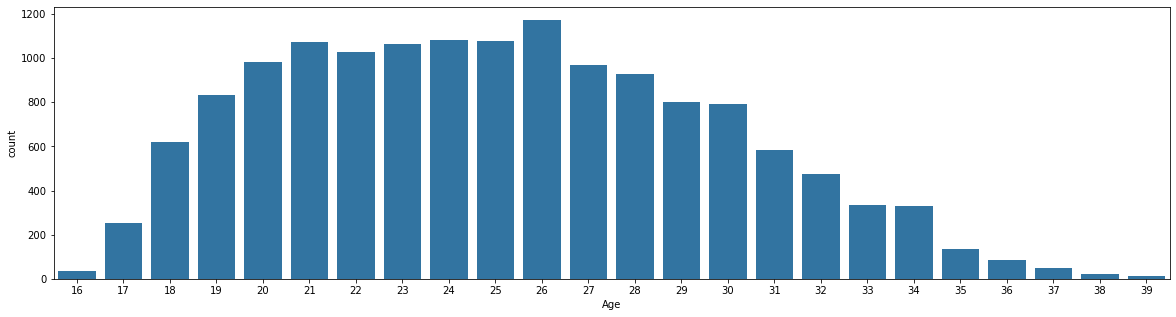

In [134]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 5])
sb.countplot(data=df , x='Age', color=base_color);

> This distribution shows most of the players in our data are in their 20s. And it's slightly positive skewed.

### Height:

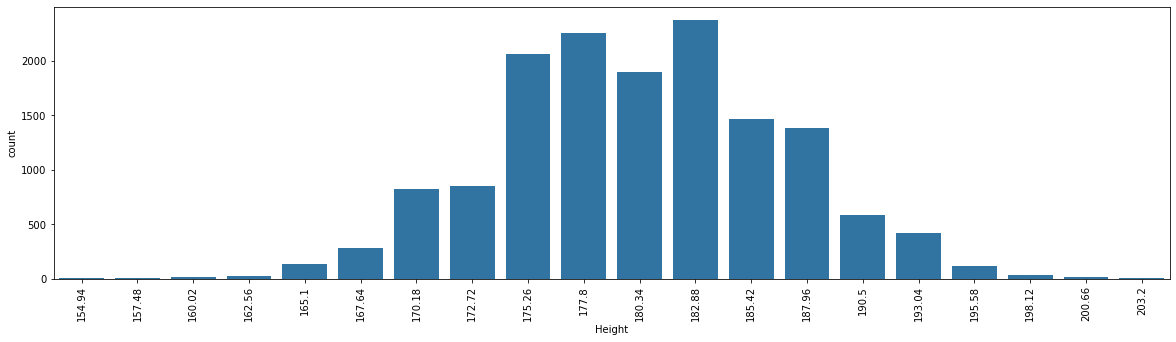

In [135]:
df['Height'] = df['Height'].round(2)
plt.figure(figsize = [20, 5])

base_color = sb.color_palette()[0]
sb.countplot(data=df , x='Height', color=base_color);
#sb.distplot(df['Height'])
plt.xticks(rotation=90) ;


> most players have height from 175cm to 188cm

### Weight:

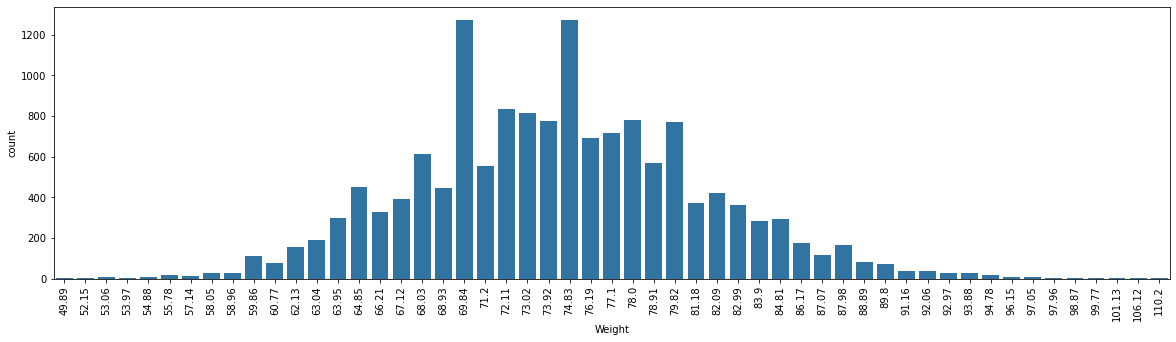

In [136]:
df['Weight'] = df['Weight'].round(2)
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='Weight', color=base_color);
#sb.distplot(df['Weight'])
plt.xticks(rotation=90) ;

> There is a wide range of weights, 69.93 kg and 73.92 players were higher, maybe its thier preferred weight for football players

### Overall:

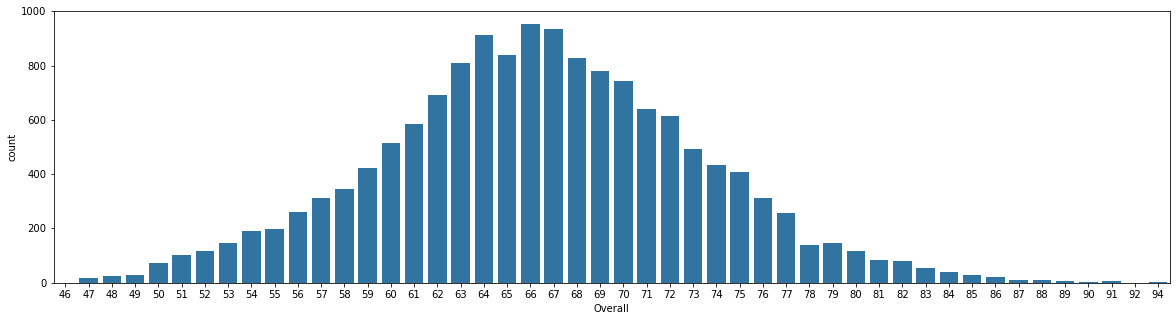

In [137]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='Overall', color=base_color);


> overall Rate is normally distributed 

### Potential Rate

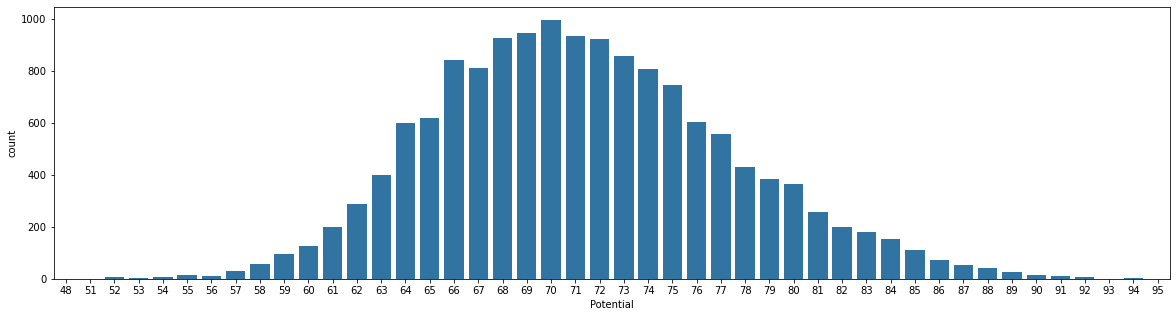

In [138]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='Potential', color=base_color);


> Potential Rate is normally distributed 

### Value :

In [139]:
np.log(df['Value'].describe())


count     9.598524
mean     14.752238
std      15.579171
min       9.210340
25%      12.765688
50%      13.493927
75%      14.603968
max      18.590424
Name: Value, dtype: float64

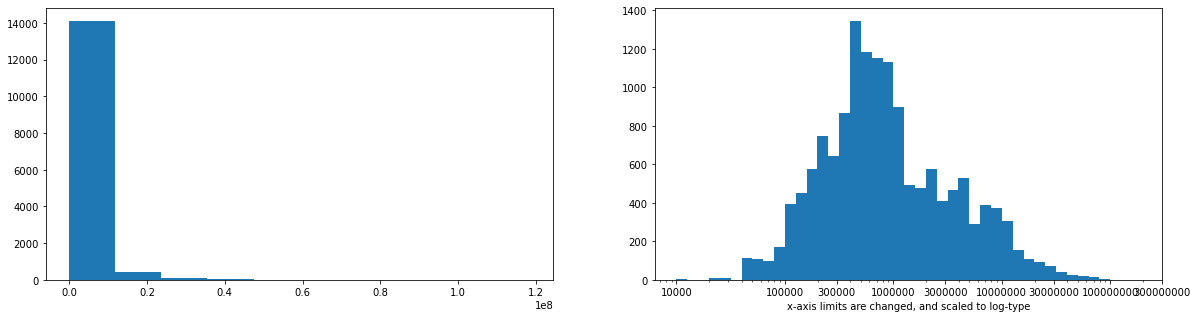

In [140]:
plt.figure(figsize = [20,5])
plt.subplot(1, 2, 1)
plt.hist(data = df, x = 'Value')
plt.subplot(1,2,2)
ticks = [10000,100000, 300000,1000000,3000000,10000000,30000000,100000000,300000000]
labels = ['{}'.format(v) for v in ticks]
bins = 10 ** np.arange(4, 8+0.1, 0.1)
plt.hist(data=df, x='Value',bins = bins);

plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlabel('x-axis limits are changed, and scaled to log-type');



In [141]:
df[df['Value'] > 10000000]['Value'].count()/df['Value'].count() * 100

5.216034728345655

> changing the x-axis and found that only 5% of players have value more then 10M

### Wage:

In [142]:
np.log(df['Wage']).describe()

count    14743.000000
mean         8.276316
std          1.231787
min          6.907755
25%          6.907755
50%          8.006368
75%          9.104980
max         13.244581
Name: Wage, dtype: float64

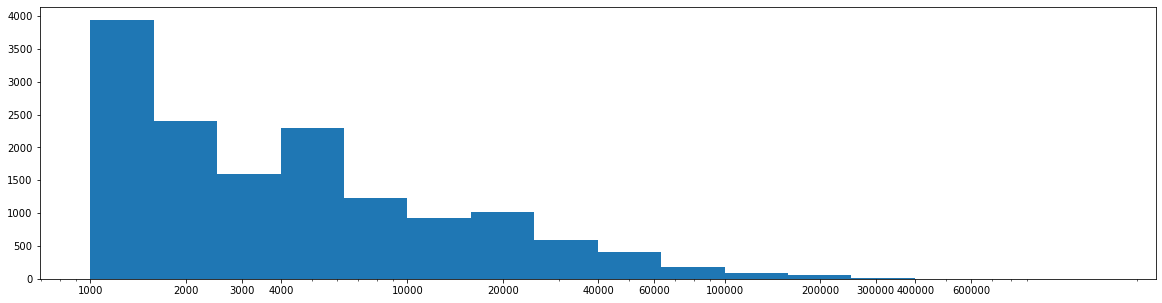

In [143]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
bins = 10 ** np.arange(3, 6.2+0.2, 0.2)

ticks = [1000, 2000, 3000, 4000, 10000, 20000, 40000, 60000, 100000, 200000, 300000, 400000,600000]
labels = ['{}'.format(v) for v in ticks]


plt.hist(data=df , x='Wage', color=base_color,bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);


In [144]:
df[df['Wage'] > 100000]['Wage'].count() / df['Wage'].count() * 100

1.1056094417689752

> only 1% have Wage more than One Hundred Thousand

### Release Clause:

In [145]:
np.log(df['Release Clause']).describe()

count    14743.000000
mean        14.247785
std          1.414347
min          9.472705
25%         13.267329
50%         13.997832
75%         15.150512
max         19.245295
Name: Release Clause, dtype: float64

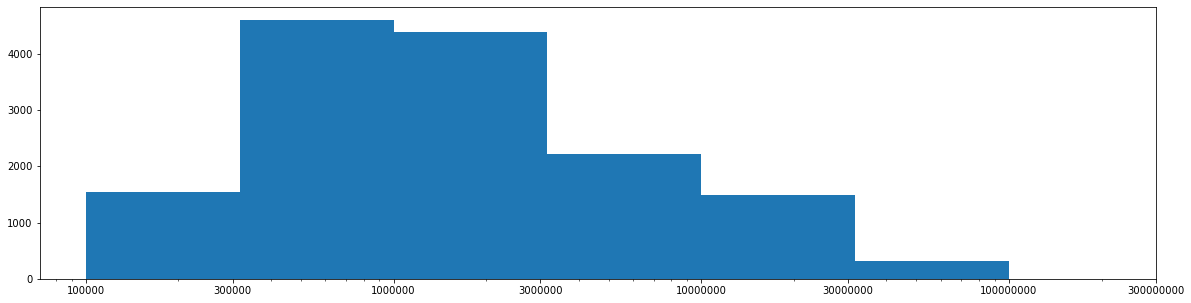

In [146]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

ticks = [100000, 300000,1000000,3000000,10000000,30000000,100000000,300000000]
labels = ['{}'.format(v) for v in ticks]

bins = 10** np.arange(5,8+0.5,0.5)
plt.hist(data=df , x='Release Clause', color=base_color, bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);


In [147]:
df[df['Release Clause'] > 30000000]['Release Clause'].count() / df['Release Clause'].count() * 100

2.672454724275928

> only 2.6% have Release Clause more than 30M

## Categorical Variables:

### Work Rate 
> Work Rates dictate where players position themselves on the pitch. it is the rate of a player’s behaviour on the pitch in terms of attacking and defensive works

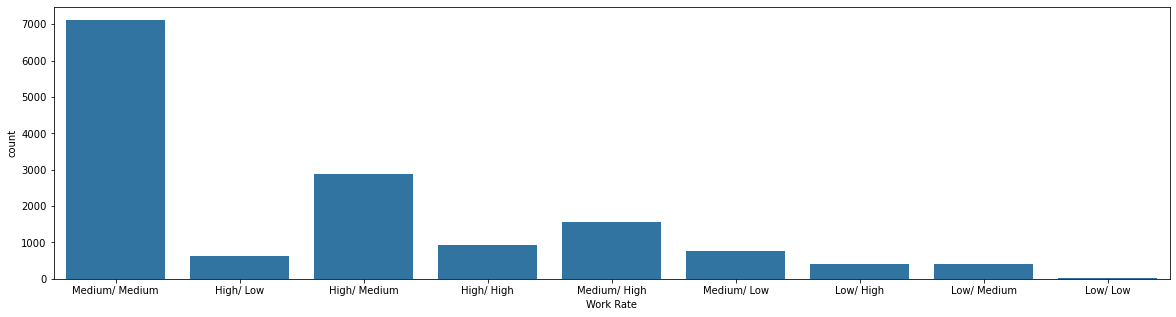

In [148]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='Work Rate', color=base_color);


> Most of the players have Work Rate of Medium/Medium

### Preferred Foot:

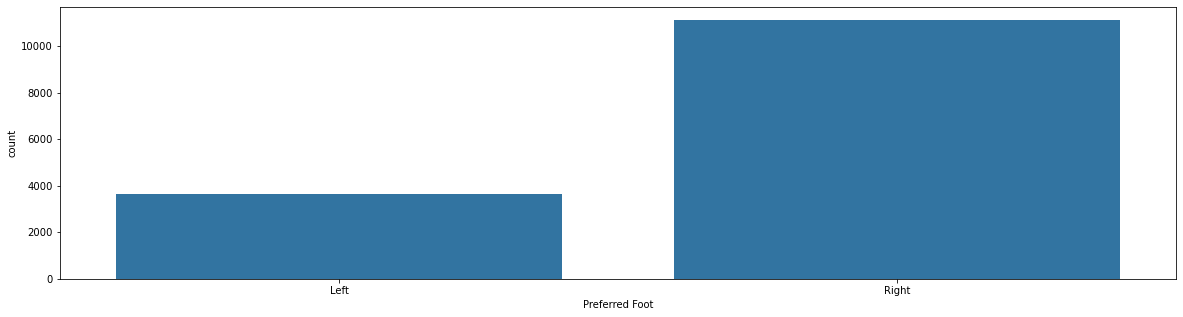

In [149]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='Preferred Foot', color=base_color);


> Most of the players preffer Right Foot .

### Position:

In [150]:
position_count = df['Position'].value_counts()
position_order = position_count.index

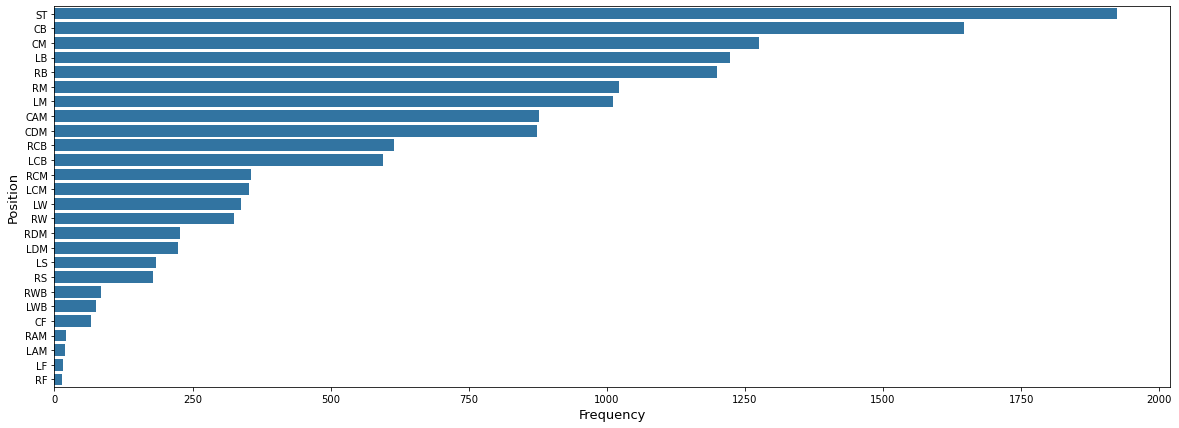

In [151]:
ax = plt.subplots(1,1, figsize=(20,7))
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'Position', color = base_color, order = position_count.index)
plt.ylabel('Position', color = 'black', fontsize = '13')
plt.xlabel('Frequency', color = 'black', fontsize = '13');

> we see that most position is St then Cb

### Top 10 most country having clubs :

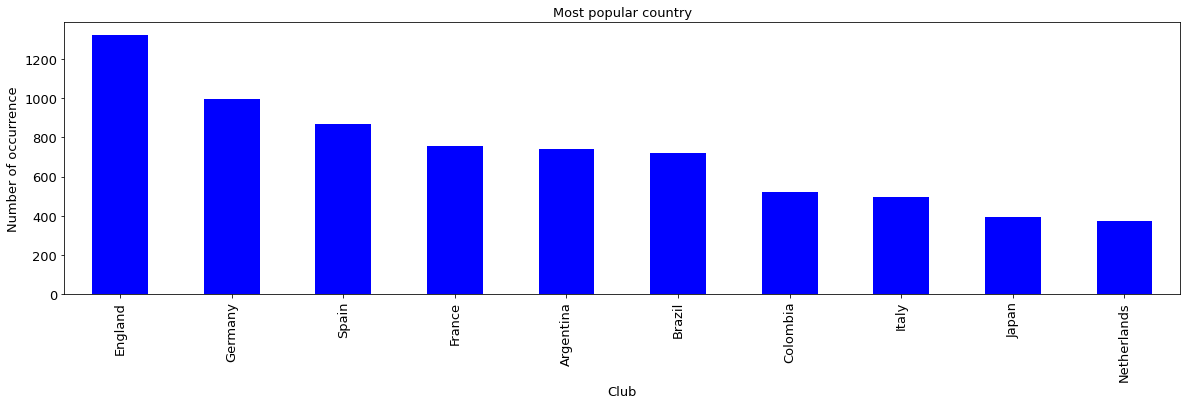

In [152]:
nation = df.Nationality.value_counts()[0:10]
g_bar = nation.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(20, 5);

#Add labels
plt.title('Most popular country', color = 'black', fontsize = '13')
plt.xlabel('Club', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

> Most players are from England 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- I started with age Variable, we found that most players are in thier 20's
- Then the Height we found that most players have Height between 175 and 188 cm
- Then the Weight There is a wide range of weights, 69.93 kg and 73.92 players were higher, maybe its thier preferred weight for football players
- Overall and Potentia Rate are normally distributed
- Value, Wage and Release Clause are Right skewed 
- only 2.6% have Release Clause more than 30M
- only 1% have Wage more than One Hundred Thousand
- only 5% of players have value more then 10M
- Work Rate of Medium/Medium has alot of players
- Most of the players preffer Right Foot
- Most position is St then Cb
- Most players are from England 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- we removed unnecessary columns such as photo, flag and so on
- checked for null and removed them
- fixed value, wage and release clause formats
- fixed Height and weight formats
- scale value, wage and release clause

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Take a look at the correleations between variables

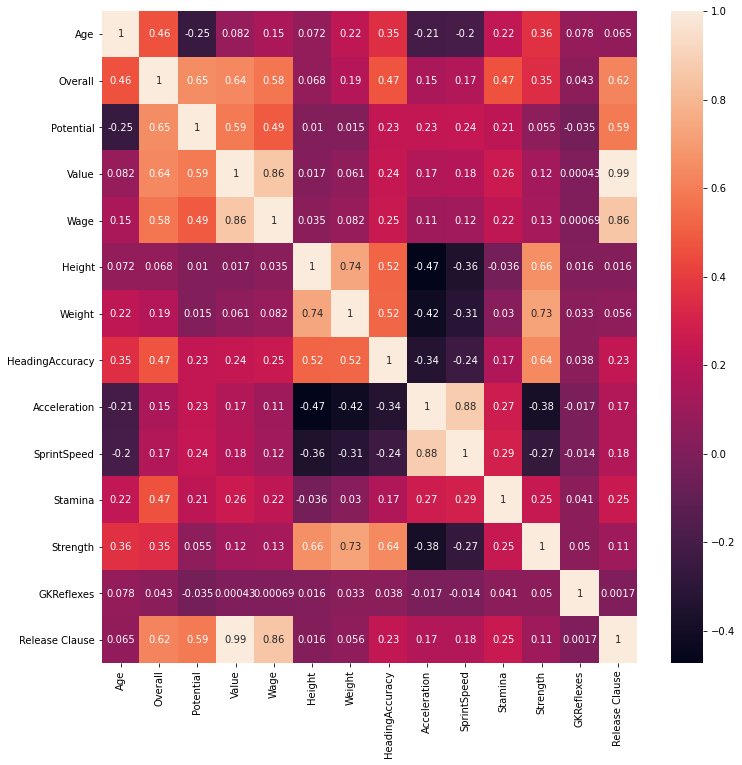

In [153]:
hist = df[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Height', 'Weight', 'HeadingAccuracy', 
                     'Acceleration','SprintSpeed','Stamina','Strength','GKReflexes','Release Clause',]]

# plotting heatmap
f, ax = plt.subplots(figsize=(12, 12))
corr = hist.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True);

> We will take a look at features that have above 0.7 and some of the negative collerations

<Figure size 1440x360 with 0 Axes>

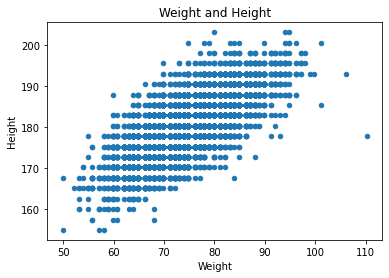

In [154]:
#Weight and height
plt.figure(figsize = [20, 5])
df.plot(x='Weight', y='Height', kind='scatter', title = 'Weight and Height'); 

> a weak postive correlation between height and weight

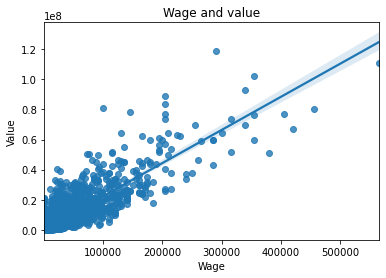

In [155]:
#Correlation between Wage and Value
sb.regplot(data = df, x='Wage', y='Value');
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title("Wage and value");

> A strong correlation between wage and value

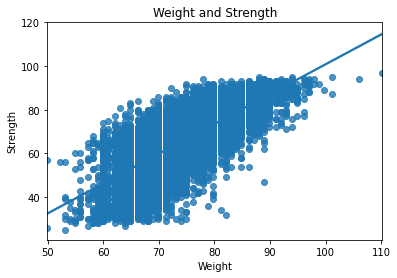

In [156]:
#Correlation between weight and strength
sb.regplot(data = df, x='Weight', y='Strength');
plt.title("Weight and Strength")
plt.xlabel('Weight')
plt.ylabel('Strength');

> There is a strong correlation between Weight and Strength.

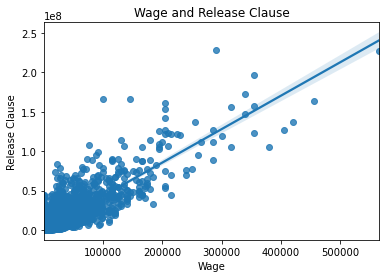

In [157]:
#Correlation between Wage and Release Clause
sb.regplot(data = df, x='Wage', y='Release Clause');
plt.title("Wage and Release Clause")
plt.xlabel('Wage')
plt.ylabel('Release Clause');

> A strong correlation between Wage and Release Clause

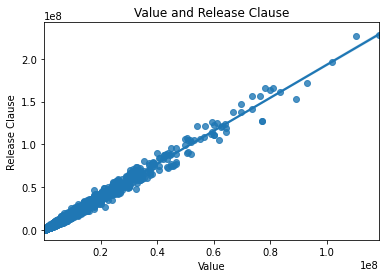

In [158]:
#Correlation between Value and Release Clause
sb.regplot(data = df, x='Value', y='Release Clause');
plt.title("Value and Release Clause")
plt.xlabel('Value')
plt.ylabel('Release Clause');

> A strong correlation Between Value and Release Clause

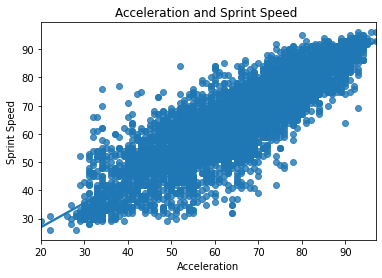

In [159]:
#Correlation between Acceleration and SprintSpeed
sb.regplot(data = df, x='Acceleration', y='SprintSpeed');
plt.title("Acceleration and Sprint Speed ")
plt.xlabel('Acceleration')
plt.ylabel('Sprint Speed');

> A strong correlation between Acceleartion and sprint speed

### negative correlations

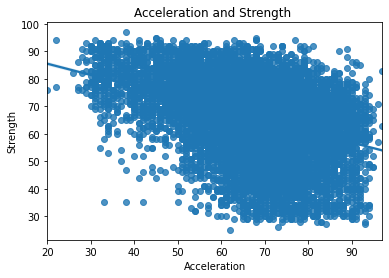

In [160]:
#Correlation between Acceleration and Strength
sb.regplot(data = df, x='Acceleration', y='Strength');
plt.title("Acceleration and Strength ")
plt.xlabel('Acceleration')
plt.ylabel('Strength');

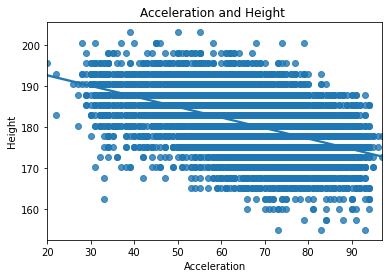

In [161]:
#Correlation between Acceleration and Height
sb.regplot(data = df, x='Acceleration', y='Height');
plt.title("Acceleration and Height ")
plt.xlabel('Acceleration')
plt.ylabel('Height');

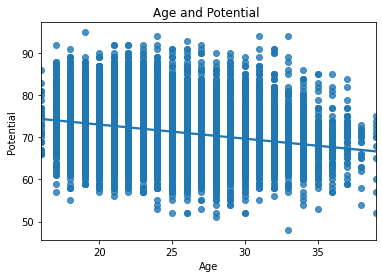

In [162]:
#Correlation between Age and Potintial
sb.regplot(data = df, x='Age', y='Potential');
plt.title("Age and Potential ")
plt.xlabel('Age')
plt.ylabel('Potential');

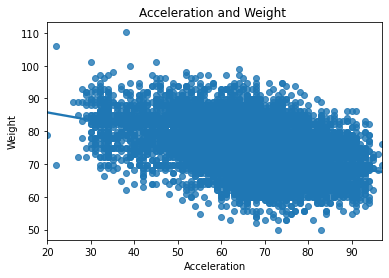

In [163]:
#Correlation between Acceleration and Weight
sb.regplot(data = df, x='Acceleration', y='Weight');
plt.title("Acceleration and Weight ")
plt.xlabel('Acceleration')
plt.ylabel('Weight');

### Observations :
- Acceleration has a negative correlation with Weight, Height and Strength
- Value has postive correlation with Wage and release clause
- Wage has postive correlation with Value and release clause
- Weight has postive correleation with Strength and height

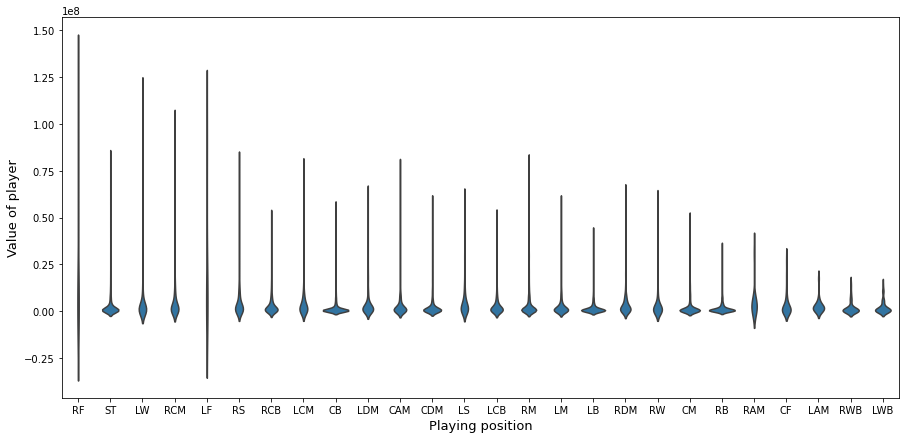

In [164]:
# plotting violin plot
ax = plt.subplots(1,1, figsize=(15,7))

base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'Position', y = 'Value', 
             color = base_color, inner = None)
plt.ylabel('Value of player', color = 'black', fontsize = '13')
plt.xlabel('Playing position', color = 'black', fontsize = '13');

> Of all playing position, Right Forward players are valued more and have more variaty in values. Right wing back position and Left wing back position are valued lowest.

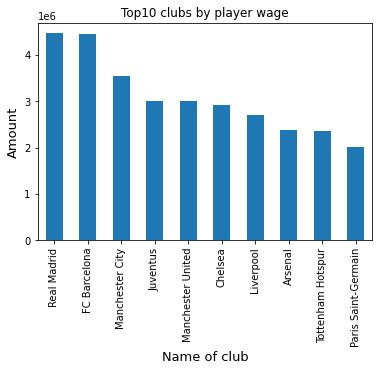

In [165]:
# Group by club then sum the wage.
wages10 = df.groupby('Club')['Wage'].sum().sort_values(ascending = False).head(10)

# plot
wages10.plot.bar(title="Top10 clubs by player wage")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Name of club', color = 'black', fontsize = '13');

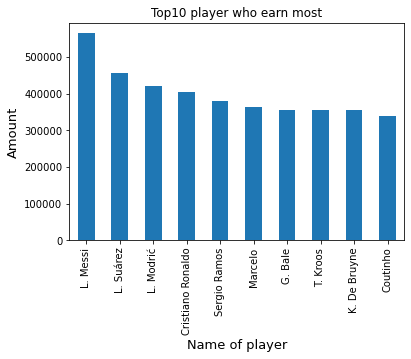

In [166]:
 # Group by name then sum the wage.
p_wages10 = df.groupby('Name')['Wage'].sum().sort_values(ascending = False).head(10)

# plot
p_wages10.plot.bar(title="Top10 player who earn most")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Name of player', color = 'black', fontsize = '13');

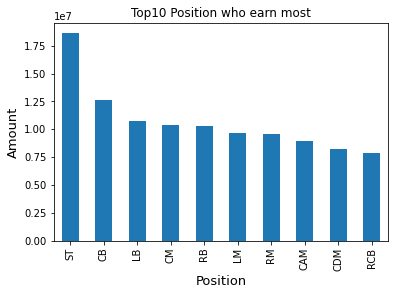

In [167]:
 # Group by Position then sum the wage.
ps_wages10 = df.groupby('Position')['Wage'].sum().sort_values(ascending = False).head(10)

# plot
ps_wages10.plot.bar(title="Top10 Position who earn most")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Position', color = 'black', fontsize = '13');

> Intersting, we found that ST earn more than the rest of all Positions 

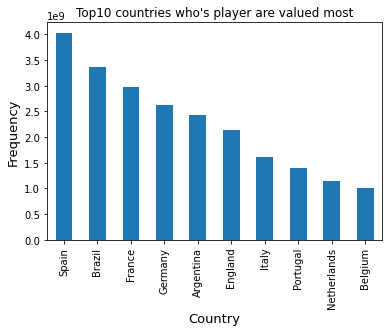

In [168]:
# Group by nationality then sum the value.
p_nation = df.groupby('Nationality')['Value'].sum().sort_values(ascending = False).head(10)

# plot
p_nation.plot.bar(title="Top10 countries who's player are valued most")
plt.ylabel('Frequency', color = 'black', fontsize = '13')
plt.xlabel('Country', color = 'black', fontsize = '13');

> It seems that Spain have a high value players

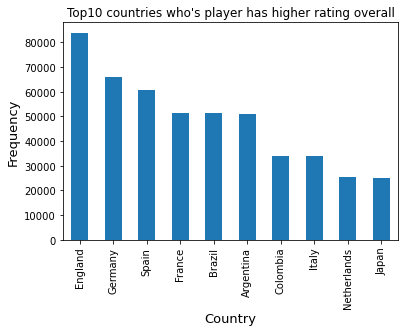

In [169]:
# Group by nationality then sum the value.
p_overall = df.groupby('Nationality')['Overall'].sum().sort_values(ascending = False).head(10)

# plot
p_overall.plot.bar(title="Top10 countries who's player has higher rating overall")
plt.ylabel('Frequency', color = 'black', fontsize = '13')
plt.xlabel('Country', color = 'black', fontsize = '13');

> also it doesnt have the most valued players but England have the highest overall rating players


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - There was both postive and negative correlation in the data set
> - We took the highest correlation between features
> - we found a weak postive correlation between height and weight
> - wages, values and Release clause the 3 of them have strong postive correlation between each other
> - Messi earns more than any other player.
> - by see if Nationality has role to play with a player's value, I found that spain and brazil have the most valued players more than england which has the highest overall rating players
> - RealMadrid and Barcelona has the most Wage for players because it have alot of stars in the team.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> player with st postison valued more than the rest of the positions

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### will make the value in ranges so we can visualize it correctly 

In [170]:
df['Value'].describe()

count    1.474300e+04
mean     2.551617e+06
std      5.833752e+06
min      1.000000e+04
25%      3.500000e+05
50%      7.250000e+05
75%      2.200000e+06
max      1.185000e+08
Name: Value, dtype: float64

In [171]:
ranges = []
for v in df['Value']:
    if(v >= 10000 and v < 350000):
        ranges.append("superlow")
    elif(v >= 350000 and v < 720000):
        ranges.append('low')
    elif(v >= 720000 and v < 2200000):
        ranges.append('medium')
    elif(v >= 2200000 and v < 10000000):
        ranges.append('high')
    elif(v >= 10000000):
        ranges.append('superhigh')
        
df['ranges'] = ranges

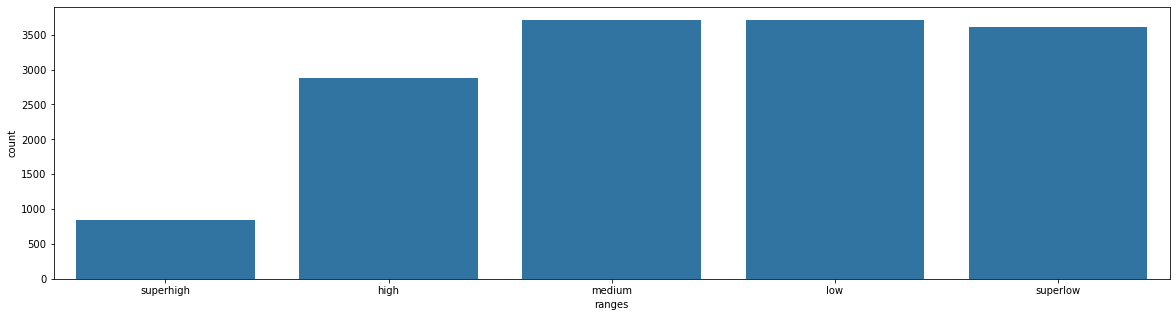

In [172]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df , x='ranges', color=base_color);


C:\Users\abdel\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


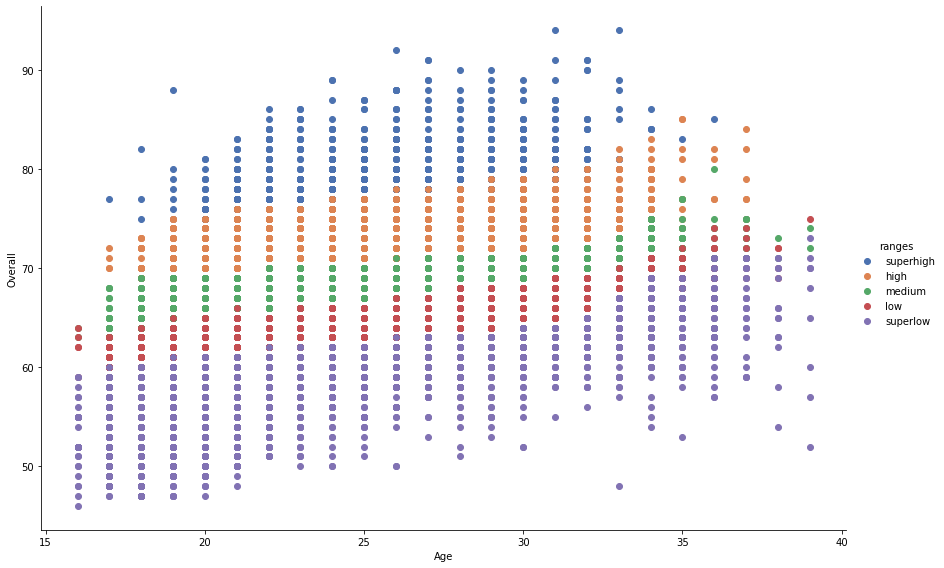

In [173]:
# plotting facet
g = sb.FacetGrid(data = df, hue = 'ranges', size = 8, aspect = 1.5,palette="deep")
g.map(plt.scatter, 'Age', 'Overall')
g.add_legend();

> we see here that the super high values are above the overall of 75 and between the age of 18 to 32 

### Talking about some of the relationships I observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I focused on making the value in ranges so I can know the players that have the highest ranges what age and overall they have in commman 



### Were there any interesting or surprising interactions between features?

> we found that super high values found in the players with ages of 18 to 32 and with overall of 75 and higher